In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
file_path = 'Exemple2Reference_SReg_PW2.xlsx'
df = pd.read_excel(file_path, sheet_name='Feuil2', usecols='A:B')
X = df['x']
Y = df['y']

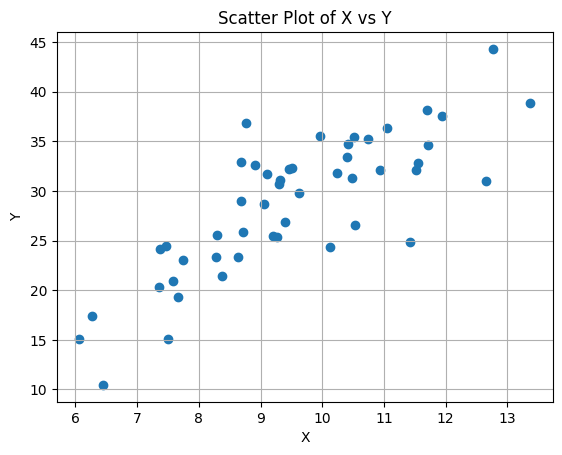

In [5]:
plt.scatter(X, Y)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [6]:
regXY =ols('Y ~ X', data=df).fit()
model = sm.OLS(Y, sm.add_constant(X))
regXY2 = model.fit()
print(regXY.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     86.86
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           2.96e-12
Time:                        10:09:56   Log-Likelihood:                -138.42
No. Observations:                  49   AIC:                             280.8
Df Residuals:                      47   BIC:                             284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2402      3.373     -0.664      0.5

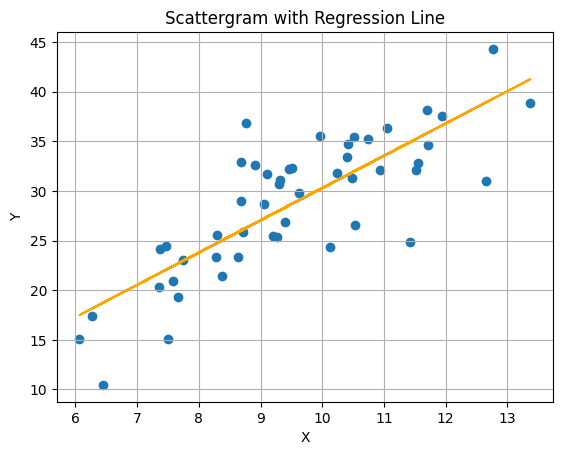

In [7]:
plt.scatter(X, Y)
plt.plot(X, regXY.params.iloc[1] * X + regXY.params.iloc[0], color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scattergram with Regression Line')
plt.grid(True)
plt.show()

In [8]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(regXY)
print(anova_results)

            df       sum_sq      mean_sq          F        PR(>F)
X          1.0  1507.141999  1507.141999  86.858806  2.957458e-12
Residual  47.0   815.526688    17.351632        NaN           NaN


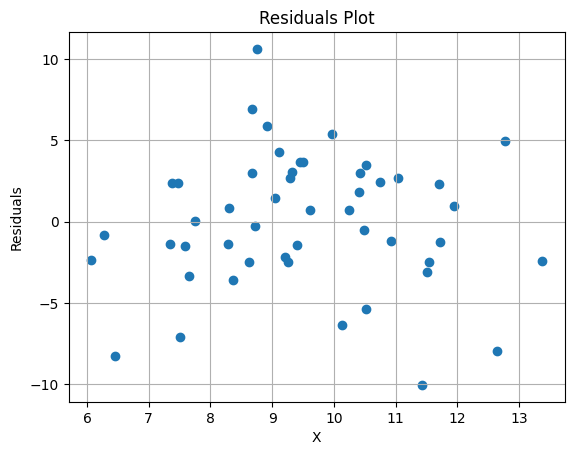

In [9]:
# Create a new figure for the residuals plot
plt.figure()
plt.scatter(X, regXY2.resid) # Plot residuals vs. X
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [10]:
import numpy as np

# 7. Confidence interval of regression coefficients with 5% level
conf_int = regXY2.conf_int(alpha=0.05) # 95% confidence interval by default
print("Confidence interval of regression coefficients with 5% level:")
print(conf_int)

# # 9. Predict the value of Y for X = 500
new_X = np.array([[1, 500]])  # explicitly adding both the constant (1) and the value of X=500
predicted_y = regXY2.predict(new_X)  # predict using the new_X
print("Predicted Y for X = 500:", predicted_y[0])

Confidence interval of regression coefficients with 5% level:
              0         1
const -9.025478  4.545057
x      2.550790  3.955136
Predicted Y for X = 500: 1624.2412764242044
